In [25]:
# Import CBFToolbox and other Julia packages
using Revise # Always import before CBFToolbox if testing functionality
using CBFToolbox
using Plots
using LaTeXStrings

In [26]:
# Construct single integrator system
Σ = single_integrator()

# Construct CBF to avoid obstacle
xo = [-1.0, 1.0]
ro = 0.4
h(x) = (x[1] - xo[1])^2 + (x[2] - xo[2])^2 - ro^2
classK(r) = r
cbf = ControlBarrierFunction(h, α=classK)

ControlBarrierFunction(h, CBFToolbox.var"#∇h#17"{typeof(h)}(h), classK)

In [27]:
# Nomial feedback policy
k(x) = -x

# Control Lyapunov function
V(x) = 0.5x'x
clf = ControlLyapunovFunction(V)

ControlLyapunovFunction(V, CBFToolbox.var"#∇V#29"{typeof(V)}(V), CBFToolbox.var"#27#30"())

In [28]:
# Simulation parameters
t0 = 0.0
tf = 10.0
dt = 0.01

# Initial condition
x0 = [-2.1, 2.0]

2-element Vector{Float64}:
 -2.1
  2.0

In [29]:
# Run sim with nominal policy and CLF-based policy
t, x = run_sim(t0, tf, dt, x0, k, Σ, cbf)

(0.0:0.01:10.0, [-2.1 -2.095350780290673 … -0.0006583741689419951 -0.0006517895043605894; 2.0 1.9948641416810349 … 0.00024965078734293545 0.0002471540027694806])

In [33]:
# Run sim with CLF policy
p = 500.0 # Relaxation penalty
t, xCLF = run_sim(t0, tf, dt, x0, Σ, cbf, clf, p)

(0.0:0.01:10.0, [-2.1 -2.275576448717404 … -0.03132288839307613 -0.031243924467602113; 2.0 1.7966159062958502 … 0.006019738838894019 0.006004542509551405])

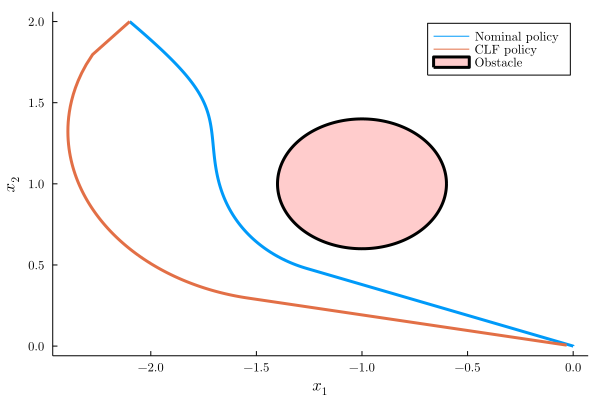

In [34]:
# Plot results
fig1 = plot(xlabel=L"x_1", ylabel=L"x_2", fontfamily="Computer Modern", grid=false)
plot!(x[1,:], x[2,:], lw=3, label="Nominal policy")
plot!(xCLF[1,:], xCLF[2,:], lw=3, label="CLF policy")
plot!(circle_shape(xo[1], xo[2], ro), seriestype=[:shape], fillcolor=:red, fillalpha=0.2, 
        linecolor=:black, lw=3, edgecolor=:black, label="Obstacle")